In [1]:
#IRREGULAR NEURONS
#14 neurons are exc, 7 are inh, Poisson spikegens connected only to exc
name_of_run="sigmadelta"

In [2]:
import samna
import samna.dynapse1 as dyn1
import time

import sys
# change the path to '/home/class_NI2021/ctxctl_contrib' on zemo
sys.path.insert(1, '/home/class_NI2021/ctxctl_contrib')
from Dynapse1Constants import *
import Dynapse1Utils as ut
import NetworkGenerator as n
from NetworkGenerator import Neuron
import numpy as np

import matplotlib 
# Display plots inline, directly below the cell that produced it.
%matplotlib inline 
import matplotlib.pyplot as plt
import time
from functions import interspike, isi_calc, find_max_time, find_min_time

# Ignore warnings  
import warnings
warnings.filterwarnings("ignore",category=UserWarning)

np.random.seed(77)

# open DYNAP-SE1 board to get Dynapse1Model
device_name = "my_dynapse1"
# change the port numbers to not have conflicts with other groups
store = ut.open_dynapse1(device_name, gui=False, sender_port=11322, receiver_port=63241)
model = getattr(store, device_name)


/home/asurin/.local/lib/python3.8/site-packages/samna
finished bindings
[0]:  Bus 3 Device 64 Dynapse1DevKit serial_number 00000027
[1]:  Bus 1 Device 66 Dynapse1DevKit serial_number 00000032
[2]:  Bus 1 Device 65 Dynapse1DevKit serial_number 00000000
[3]:  Bus 1 Device 68 Dynapse1DevKit serial_number 00000007
[4]:  Bus 1 Device 67 Dynapse1DevKit serial_number 00000020
[5]:  Bus 1 Device 63 Dynapse1DevKit serial_number 00000033


In [ ]:
def gen_param_group_1core():
    paramGroup = dyn1.Dynapse1ParameterGroup()
    # THR, gain factor of neurons
    paramGroup.param_map["IF_THR_N"].coarse_value = 5
    paramGroup.param_map["IF_THR_N"].fine_value = 80

    # refactory period of neurons
    paramGroup.param_map["IF_RFR_N"].coarse_value = 4 
    paramGroup.param_map["IF_RFR_N"].fine_value = 128

    # leakage of neurons
    paramGroup.param_map["IF_TAU1_N"].coarse_value =4 #4
    paramGroup.param_map["IF_TAU1_N"].fine_value = 80

    # turn off tau2
    paramGroup.param_map["IF_TAU2_N"].coarse_value = 7
    paramGroup.param_map["IF_TAU2_N"].fine_value = 255

    # turn off DC
    paramGroup.param_map["IF_DC_P"].coarse_value = 0
    paramGroup.param_map["IF_DC_P"].fine_value = 0

    # leakage of AMPA
    paramGroup.param_map["NPDPIE_TAU_F_P"].coarse_value = 4
    paramGroup.param_map["NPDPIE_TAU_F_P"].fine_value = 80

    # gain of AMPA
    paramGroup.param_map["NPDPIE_THR_F_P"].coarse_value = 4
    paramGroup.param_map["NPDPIE_THR_F_P"].fine_value = 80

    # weight of AMPA
    # NOTE: !!!!!!!!!!!!!!!!!!!!!!! remember to set the weight of AMPA !!!!!!!!!!!!!!!!!!!!!!!
    paramGroup.param_map["PS_WEIGHT_EXC_F_N"].coarse_value = 5 #6 
    paramGroup.param_map["PS_WEIGHT_EXC_F_N"].fine_value = 80 #100

    # leakage of NMDA
    paramGroup.param_map["NPDPIE_TAU_S_P"].coarse_value = 4
    paramGroup.param_map["NPDPIE_TAU_S_P"].fine_value = 80

    # gain of NMDA
    paramGroup.param_map["NPDPIE_THR_S_P"].coarse_value = 5  #4
    paramGroup.param_map["NPDPIE_THR_S_P"].fine_value = 50 #80

    # weight of NMDA
    paramGroup.param_map["PS_WEIGHT_EXC_S_N"].coarse_value = 5 #6
    paramGroup.param_map["PS_WEIGHT_EXC_S_N"].fine_value = 50 #40 #80

    # leakage of GABA_A (shunting)
    paramGroup.param_map["NPDPII_TAU_F_P"].coarse_value = 4
    paramGroup.param_map["NPDPII_TAU_F_P"].fine_value = 80

    # gain of GABA_A (shunting)
    paramGroup.param_map["NPDPII_THR_F_P"].coarse_value = 4
    paramGroup.param_map["NPDPII_THR_F_P"].fine_value = 80

    # weight of GABA_A (shunting)
    paramGroup.param_map["PS_WEIGHT_INH_F_N"].coarse_value = 0
    paramGroup.param_map["PS_WEIGHT_INH_F_N"].fine_value = 0

    # leakage of GABA_B
    paramGroup.param_map["NPDPII_TAU_S_P"].coarse_value = 4
    paramGroup.param_map["NPDPII_TAU_S_P"].fine_value = 80

    # gain of GABA_B
    paramGroup.param_map["NPDPII_THR_S_P"].coarse_value = 4  #4
    paramGroup.param_map["NPDPII_THR_S_P"].fine_value = 80 #80

    # weight of GABA_B
    paramGroup.param_map["PS_WEIGHT_INH_S_N"].coarse_value = 3 #1
    paramGroup.param_map["PS_WEIGHT_INH_S_N"].fine_value = 100

    # other advanced parameters
    paramGroup.param_map["IF_NMDA_N"].coarse_value = 0 #0
    paramGroup.param_map["IF_NMDA_N"].fine_value = 0 #0

    #adaptation parameter 1/4
    paramGroup.param_map["IF_AHTAU_N"].coarse_value = 0 #6
    paramGroup.param_map["IF_AHTAU_N"].fine_value = 0 #80

    #adaptation parameter 2/4
    paramGroup.param_map["IF_AHTHR_N"].coarse_value = 0 #0
    paramGroup.param_map["IF_AHTHR_N"].fine_value =  0 #0

    #adaptation parameter 3/4
    paramGroup.param_map["IF_AHW_P"].coarse_value = 0 #0
    paramGroup.param_map["IF_AHW_P"].fine_value = 0 #0

    #adaptation parameter 4/4
    paramGroup.param_map["IF_CASC_N"].coarse_value = 0 #0
    paramGroup.param_map["IF_CASC_N"].fine_value =0 #0

    paramGroup.param_map["PULSE_PWLK_P"].coarse_value = 4
    paramGroup.param_map["PULSE_PWLK_P"].fine_value = 106

    paramGroup.param_map["R2R_P"].coarse_value = 3
    paramGroup.param_map["R2R_P"].fine_value = 85

    paramGroup.param_map["IF_BUF_P"].coarse_value = 3
    paramGroup.param_map["IF_BUF_P"].fine_value = 80

    return paramGroup



Error: Session cannot generate requests

In [ ]:

# set initial (proper) parameters of 16 cores
paramGroup = gen_param_group_1core()
for chip in range(4):
    for core in range(4):
        model.update_parameter_group(paramGroup, chip, core)

In [ ]:
#generate indexes for the connections
#0 to 14 excitatory 
output_j = np.zeros((21*7,))

for i in range(21):       
    indxs = np.arange(21)
    np.random.shuffle(indxs)
    indxs_delete=np.delete(indxs,np.where(indxs==i))
    output_j[(i*7):(i*7+7)] = indxs_delete[0:7]

output_j = output_j.astype(int)
output_j = np.ndarray.tolist(output_j)

output_i = np.repeat(range(21),7)
output_i = np.ndarray.tolist(output_i)

idx_ee_i = []
idx_ee_j = []

idx_ei_i = []
idx_ei_j = []

idx_ie_i = []
idx_ie_j = []


for a,i in enumerate(output_i):
    #print(a)
    j = output_j[a] 
    if i <= 13: 
        if j <= 13: 
            #print(i,j)
            idx_ee_i.append(i)
            idx_ee_j.append(j)
        if j > 13:
            idx_ei_i.append(i)
            idx_ei_j.append(j)
    if i > 13:
        idx_ie_i.append(i)
        idx_ie_j.append(j)
    

In [ ]:
#CREATE NETWORK

net_gen = n.NetworkGenerator()
#net_gen.clear_network()

spikegen_up = Neuron(0,0,1,True)
spikegen_down = Neuron(0,0,2,True)

#CORE 0 IRREGULAR NEURONS
# select the neurons
chip_ir = 0
core_ir = 0
num_neurons_ir = 21
start_neuron_id_ir = 15
neuron_ids_ir = []
neurons_ir = []

for id in range(num_neurons_ir):
    neuron_ids_ir.append((chip_ir,core_ir,start_neuron_id_ir + id))
print("Neuron for irregular indexes (first 14 exc,last 7 inh):{}".format(neuron_ids_ir))

for neuron_id in neuron_ids_ir:
    neurons_ir.append(Neuron(neuron_id[0],neuron_id[1],neuron_id[2],False))


""" #create synapses spikegen-neurons exc
for i in range(14):
    net_gen.add_connection(spikegens_ir[i], neurons_ir[i], dyn1.Dynapse1SynType.AMPA)
#default was AMPA, should we change to NMDA?  """

for i in range(14):
    net_gen.add_connection(spikegen_up, neurons_ir[i], dyn1.Dynapse1SynType.AMPA)

for i in range(14):
    net_gen.add_connection(spikegen_down, neurons_ir[i], dyn1.Dynapse1SynType.GABA_B)

#excitatory-excitatory synapses
for pre_id,post_id in zip(idx_ee_i,idx_ee_j):
    #print(pre_id,post_id)
    net_gen.add_connection(neurons_ir[pre_id], neurons_ir[post_id], dyn1.Dynapse1SynType.NMDA)

#excitatory-inhibitory synapses
for pre_id,post_id in zip(idx_ei_i,idx_ei_j):
    #print(pre_id,post_id)
    net_gen.add_connection(neurons_ir[pre_id], neurons_ir[post_id], dyn1.Dynapse1SynType.AMPA)

#inhibitory-excitatory synapses
for pre_id,post_id in zip(idx_ie_i,idx_ie_j):
    #print(pre_id,post_id)
    net_gen.add_connection(neurons_ir[pre_id], neurons_ir[post_id], dyn1.Dynapse1SynType.GABA_B)

# print the network so you can double check (optional)
net_gen.print_network()
# make a dynapse1config using the network
new_config = net_gen.make_dynapse1_configuration()
# apply the configuration
model.apply_configuration(new_config)



Neuron for irregular indexes (first 14 exc,last 7 inh):[(0, 0, 15), (0, 0, 16), (0, 0, 17), (0, 0, 18), (0, 0, 19), (0, 0, 20), (0, 0, 21), (0, 0, 22), (0, 0, 23), (0, 0, 24), (0, 0, 25), (0, 0, 26), (0, 0, 27), (0, 0, 28), (0, 0, 29), (0, 0, 30), (0, 0, 31), (0, 0, 32), (0, 0, 33), (0, 0, 34), (0, 0, 35)]
Post neuron (ChipId,coreId,neuronId): incoming connections [(preNeuron,synapseType), ...]
C0c0n15: [('C0c0n1', 'AMPA'), ('C0c0n17', 'NMDA'), ('C0c0n18', 'NMDA'), ('C0c0n25', 'NMDA'), ('C0c0n26', 'NMDA'), ('C0c0n28', 'NMDA'), ('C0c0n29', 'GABA_B'), ('C0c0n31', 'GABA_B'), ('C0c0n32', 'GABA_B'), ('C0c0n33', 'GABA_B')]
C0c0n16: [('C0c0n1', 'AMPA'), ('C0c0n15', 'NMDA'), ('C0c0n18', 'NMDA'), ('C0c0n19', 'NMDA'), ('C0c0n23', 'NMDA'), ('C0c0n24', 'NMDA'), ('C0c0n29', 'GABA_B'), ('C0c0n30', 'GABA_B')]
C0c0n17: [('C0c0n1', 'AMPA'), ('C0c0n15', 'NMDA'), ('C0c0n16', 'NMDA'), ('C0c0n20', 'NMDA'), ('C0c0n27', 'NMDA'), ('C0c0n28', 'NMDA'), ('C0c0n30', 'GABA_B'), ('C0c0n31', 'GABA_B')]
C0c0n18: [('C

In [ ]:
from scipy import signal
#Firstly we define the head direciton signal.

#Following the paper of Sadeghi et al., we construct a broadband noise stimuli characterized by a Gaussian 
#distribution of rotational velocities with mean = 0 and std = 20 degrees/s. The Signal is then low-pass filtered at 
#30 Hz.

def gaussian_head_signal(mu, sigma, duration, freq):
    """
    Generates a time series signal of a broadband noise signal characterized by a Gaussian distribution with a 
    certain mean and standard deviation, corresponding to angular velocity. Plots the signal in time
    
    Args: 
        mu (float): mean of the gaussian distribution
        sigma (float): standard deviaiton of gaussian distribution
        duration (np.ndarray): number of time points to sample (s)
        freq (float): frequency boundary for low-pass filter
        
    Returns:
            head_signal (np.ndarray): signal of head direction velocities generated by the gaussian
            head_signal_filtered (np.ndarray): lowpass filtered head velocity signal
            freq_signal_filtered (np.ndarray): lowpass filtered frequency signal
        
    """
    
    
    
    x = np.linspace(0, duration, int(duration*1e3)) 
    head_signal = np.random.normal(mu, sigma*(np.pi/180), int(duration*1e3))#np.random.normal(mu, sigma*(np.pi/180), int(duration*1e3))
    
    
    sos = signal.butter(10, 30, 'lowpass', fs=1000, output='sos')
    freq_signal_filtered = signal.sosfilt(sos, head_signal/(2*np.pi))
    
    
    head_signal_filtered = freq_signal_filtered*(2*np.pi)*(180/np.pi)
    
    plt.figure(figsize=(8, 13))
    
    plt.subplot(211)
    plt.plot(x, head_signal, color='tab:blue')
    plt.title("Unfiltered head velocity stimulus")
    plt.xlabel("time (s)")
    plt.ylabel("rad/s")

    plt.subplot(212)
    plt.plot(x, head_signal_filtered, color='tab:orange')
    plt.title("Filtered head velocity stimulus")
    plt.xlabel("time (s)")
    plt.ylabel("degrees/s")
    
    #plt.subplot(224)
    #plt.plot(x, freq_signal_filtered, color='tab:red')
    
    plt.show()
    
    return head_signal, head_signal_filtered, freq_signal_filtered

In [ ]:
#Sigma delta modulator for the head direction signal
from numba import njit 
from scipy.interpolate import interp1d

#Usage:
    #converts signal into UP and DOWN spikes using the Adaptive Delta Modulation scheme.
    #spike times are determined through linear interpolation between the current and the next sampling point
    
#Input Parameters:
    #input_signal (array): input signal
    #threshold_UP (float): threshold for UP spikes to occur
    #threshold_DOWN (float): threshold for DOWN spikes to occur
    #sampling_frequency (float): sampling frequency of the input signal (1/dt)
    #refractory_period_duration (float): refractory period in which spikes can not occur (NEEDS TO BE AT LEAST 1/sampling_frequency)
    #return_indices (bool): if False, returns only spike times. If True, retuns a new time array along with UP and DOWN indices arrays which indicate when respective spikes occured
    #index_dt (float): dt of ouput indices (for higher accuracy, use non-numba ADM as it will be faster)
    #Vdc_reset (bool): determines whether signal continues to integrate in the refractory period (False)
    #or whether the integration is reset and signal needs to integrate the full threshold after the refractory period (True)
    
#Output Parameters:
    #spike_t_up (array): list of precise UP spike times
    #spike_t_dn (array): list of precise DOWN spike times
    #times_interpolated (array): time array for spike indices arrays (dt = index_dt)
    #spike_idx_up (array of shape times_interpolated): closest times to UP spikes in times_interpolated are set to 1; rest is 0 
    #spike_idx_dn (array of shape times_interpolated): closest times to DOWN spikes in times_interpolated are set to 1; rest is 0 
    
def ADM(input_signal,threshold_UP,threshold_DOWN,sampling_frequency,refractory_period_duration,return_indices = True,index_dt = 1e-4, Vdc_reset = True):
    dt = 1/sampling_frequency
    end_time = len(input_signal)*dt
    times = np.linspace(0,end_time,len(input_signal))
    if refractory_period_duration < dt:
        interpolation_factor = 1
        while dt > refractory_period_duration:
            interpolation_factor += 1
            dt = 1/(sampling_frequency*interpolation_factor)
        f = interp1d(times, input_signal)
        times = np.arange(0,times[-1],dt)
        input_signal = f(times)
        sampling_frequency = 1/times[1]
    spike_t_up,spike_t_dn,times_interpolated,spike_idx_up,spike_idx_dn = ADM_numba(input_signal,threshold_UP,threshold_DOWN,sampling_frequency,refractory_period_duration,return_indices,index_dt, Vdc_reset)
    return (spike_t_up,spike_t_dn,times_interpolated,spike_idx_up,spike_idx_dn)

@njit(fastmath=True, parallel = True)
def ADM_numba(input_signal,threshold_UP,threshold_DOWN,sampling_frequency,refractory_period_duration,return_indices = True,index_dt = 1e-4, Vdc_reset = True):

    dt = 1/sampling_frequency
    end_time = len(input_signal)*dt
    times = np.linspace(0,end_time,len(input_signal)).astype(np.float64)
    DC_Voltage = input_signal[0]
    remainder_of_refractory = 0
    spike_t_up = times[0:2]
    spike_t_dn = times[0:2]
    interpolate_from = 0.0
    interpolation_activation = 0
    intercept_point=0
    for i,t in enumerate(times):
        slope = ((input_signal[i]-input_signal[i-1])/dt)
        if remainder_of_refractory > dt:
            remainder_of_refractory = remainder_of_refractory-dt
            interpolation_activation = 1
            
            if Vdc_reset:
                DC_Voltage = (input_signal[i] - interpolate_from*slope)

        else:
            
            if interpolation_activation == 1:
                interpolate_from = interpolate_from-remainder_of_refractory
                Vbelow = (input_signal[i] - interpolate_from*slope)
                DC_Voltage = Vbelow
                
                if DC_Voltage + threshold_UP < (input_signal[i] - interpolate_from*slope):
                    spike_t_up = np.append(spike_t_up,t-interpolate_from)
                    remainder_of_refractory = refractory_period_duration 
                    DC_Voltage = (input_signal[i] - interpolate_from*slope)
                    interpolation_activation = 0
                    continue

                if DC_Voltage - threshold_DOWN > (input_signal[i] - interpolate_from*slope):
                    spike_t_dn= np.append(spike_t_dn,t-interpolate_from)
                    remainder_of_refractory = refractory_period_duration 
                    DC_Voltage = (input_signal[i] - interpolate_from*slope)
                    interpolation_activation = 0
                    continue
                
            else:
                Vbelow = input_signal[i-1]
                interpolate_from = dt

            if DC_Voltage + threshold_UP <= input_signal[i]:
                intercept_point = t-interpolate_from+((threshold_UP+DC_Voltage-Vbelow)/slope)
                spike_t_up = np.append(spike_t_up,intercept_point)
                interpolate_from = t+dt-intercept_point
                remainder_of_refractory = refractory_period_duration 
                DC_Voltage = (input_signal[i] - interpolate_from*slope)

            elif DC_Voltage - threshold_DOWN >= input_signal[i]:
                intercept_point = t-interpolate_from+((-threshold_DOWN+DC_Voltage-Vbelow)/slope)
                spike_t_dn = np.append(spike_t_dn,intercept_point)
                interpolate_from = t+dt-intercept_point
                remainder_of_refractory = refractory_period_duration 
                DC_Voltage = (input_signal[i] - interpolate_from*slope)

            interpolation_activation = 0
                        
    index =[0,1]
    spike_t_up = np.delete(spike_t_up, index)
    spike_t_dn = np.delete(spike_t_dn, index)
    if return_indices:
        times_interpolated =   np.arange(0,end_time,index_dt)
        spike_idx_up = np.zeros_like(times_interpolated)
        spike_idx_dn = np.zeros_like(times_interpolated)
        idxdn = np.searchsorted(times_interpolated,spike_t_dn)
        spike_idx_dn[idxdn] = 1
        idxup = np.searchsorted(times_interpolated,spike_t_up)
        spike_idx_up[idxup] = 1
    return (spike_t_up,spike_t_dn,times_interpolated,spike_idx_up,spike_idx_dn)

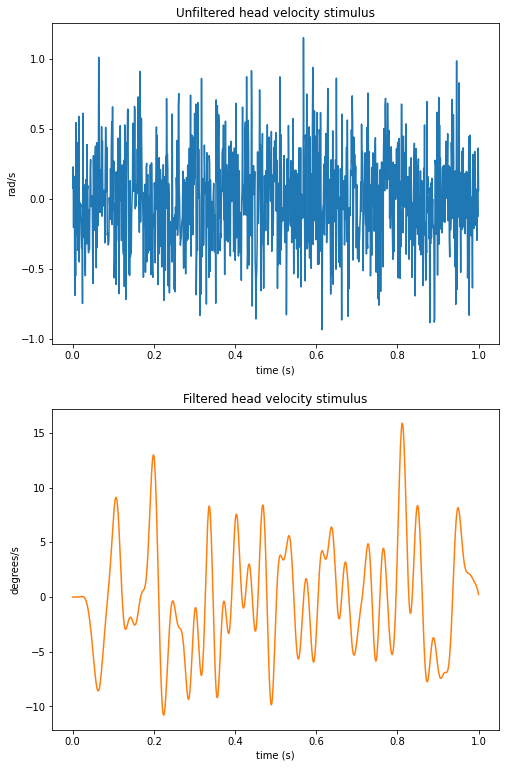

In [ ]:
# Now test on mu = 0 and std = 20 deg as stated in the paper
mu = 0
sigma = 20
duration = 1
freq = 30

np.random.seed(77)
head_signal, head_signal_filtered, freq_signal  = gaussian_head_signal(mu, sigma, duration, freq)

In [ ]:
input_signal = head_signal_filtered*0.01
threshold_UP = 0.03
threshold_DOWN = 0.03
dt = 1e-3
sampling_frequency = 1/dt
refractory_period_duration = 1/sampling_frequency

spike_t_up, spike_t_down, times_interpolated,spike_idx_up, spike_idx_down =  ADM(input_signal,threshold_UP,threshold_DOWN,
                                                  sampling_frequency,refractory_period_duration,
                                                  return_indices = True,index_dt = 1e-3, Vdc_reset = True)

plt.figure(figsize = (15,10))
plt.plot(head_signal_filtered)
plt.vlines(spike_t_down*1000, -1, 1, colors = "g",label = "up spikes")
plt.vlines(spike_t_up*1000, -1, 1, colors = "r",label="down spikes")
plt.legend()
#print(spike_t_down)
#print(spike_t_down)

In [ ]:
# get the fpga spike gen from Dynapse1Model
#spike_t_up = spike_t_up.tolist()
#print(spike_t_up.dtype)
#s = np.array([0.10110785, 0.11072627 ,0.1183185 , 0.12491149, 0.13090515 ,0.136508])
#s1 = spike_t_up[0:20]
#s2 = np.linspace(0,5,320)

#SPIKES UP
fpga_spike_gen_up = model.get_fpga_spike_gen()

spikegen_id = 1
indices = [spikegen_id]*len(spike_t_up)

post_chip = chip_r
target_chips = [post_chip]*len(spike_t_up)

# set up the fpga_spike_gen
ut.set_fpga_spike_gen(fpga_spike_gen_up, spike_t_up , indices = indices, target_chips=target_chips, isi_base= 900, repeat_mode = False)

#SPIKES DOWN
fpga_spike_gen_down = model.get_fpga_spike_gen()

spikegen_id = 2
indices = [spikegen_id]*len(spike_t_down)

post_chip = chip_r
target_chips = [post_chip]*len(spike_t_down)

# set up the fpga_spike_gen
ut.set_fpga_spike_gen(fpga_spike_gen_down, spike_t_down , indices = indices, target_chips=target_chips, isi_base= 900, repeat_mode = False)



#INDICES SET TO ONE OF THE PFGA, NEED TO CONNECT ALL TO ONE

# remember to start the spikegen


In [ ]:
#parameter update cell, do not run!!!!

#DC current
param = dyn1.Dynapse1Parameter("IF_DC_P",0,0)  #5,50
model.update_single_parameter(param,  0, 0)

# gain of NMDA
param = dyn1.Dynapse1Parameter("NPDPIE_THR_S_P",3,150) #5,50
model.update_single_parameter(param,  0, 0)

#NMDA weight
param = dyn1.Dynapse1Parameter("PS_WEIGHT_EXC_S_N",5,150) #7,100 
model.update_single_parameter(param,  0, 0)

#AMPA weight
param = dyn1.Dynapse1Parameter("PS_WEIGHT_EXC_F_N",6,200) #7,80
model.update_single_parameter(param,  0, 0)

#GABA_B
param = dyn1.Dynapse1Parameter("PS_WEIGHT_INH_S_N",4,80) #1,100
model.update_single_parameter(param,  0, 0)

In [ ]:
synapse_api = model.get_dynapse1_api()
synapse_api.monitor_neuron(0, 20)
print(synapse_api)

<samna.device_node.__Remote__dynapse1::Dynapse1Interface__ object at 0x7f11b474de50>


In [ ]:
#monitor neurons
monitored_global_nids_ir = ut.get_global_id_list(neuron_ids_ir)

#monitr spikegen
#monitored_global_nids_ir = [1]

# create a graph to monitor the spikes of these neurons
graph, filter_node, sink_node = ut.create_neuron_select_graph(model, monitored_global_nids_ir)

#1 second 
duration = 1

# start monitor
graph.start()

# start the stimulus
#poisson_gen_ir.start()
#print("Starting Poisson spikegen for irregular neurons")
#fpga_spike_gen.start()
fpga_spike_gen_up.start()
fpga_spike_gen_down.start()
# ------------ get events -----------
# clear the output buffer
sink_node.get_buf()
# sleep
time.sleep(duration)
#poisson_gen_ir.stop()
#print("Stopping Poisson spikegen for irregular neurons")
#time.sleep(0)

# get the events accumulated during the past 2 sec
events = sink_node.get_buf()

# ------------ get events -----------

# stop the stimulus
fpga_spike_gen_up.stop()
fpga_spike_gen_down.stop()


# stop graph
graph.stop()


#timestamps of spikes
timestamps = []
frequencies = []

for i in range(num_neurons_ir):
    neur_timestamps_id = i
    timestamps_one_neuron = []
    for evt in events:
        if (evt.neuron_id-start_neuron_id_ir) == neur_timestamps_id:
            timestamps_one_neuron.append(evt.timestamp)

    frequency_one_neuron = len(timestamps_one_neuron)/duration
    print("Neuron {} timestamps: {}".format(i,timestamps_one_neuron))
    print("Spiking frequecy: {} Hz".format(frequency_one_neuron))

    timestamps.append(timestamps_one_neuron)
    frequencies.append(frequency_one_neuron)

timestamps_original = timestamps
'''
#monitor spikegen
spikegen_timestamps = []
for evt in events:
    spikegen_timestamps.append(evt.timestamp)

print("spikegen timestamps:  {}".format(spikegen_timestamps))
'''



Neuron 0 timestamps: [460923449, 460939090, 460960243, 460973167, 460987184, 460998926, 461009932, 461022324, 461042284, 461058201, 461075105, 461089216, 461100675, 461110702, 461142038, 461152168, 461166492, 461176733, 461199051, 461210235, 461230128, 461239850, 461272890, 461283564, 461301106, 461315466, 461332496, 461345193, 461356568, 461367214, 461381224, 461406648, 461420154, 461436173, 461451213, 461470239, 461482191, 461503265, 461515971, 461527257, 461543266, 461565231, 461580126, 461603234, 461617219, 461630154, 461643188, 461661904, 461672161, 461691158, 461702961, 461715247, 461748523, 461758488, 461789082, 461802233, 461813561, 461830470, 461844139, 461858326, 461878135, 461896249]
Spiking frequecy: 62.0 Hz
Neuron 1 timestamps: [460927129, 460943611, 460964573, 460984545, 461001625, 461019006, 461045542, 461062563, 461078664, 461093180, 461108165, 461144971, 461161603, 461180099, 461202414, 461220854, 461238474, 461253185, 461276087, 461295701, 461308654, 461335539, 461350

'\n#monitor spikegen\nspikegen_timestamps = []\nfor evt in events:\n    spikegen_timestamps.append(evt.timestamp)\n\nprint("spikegen timestamps:  {}".format(spikegen_timestamps))\n'

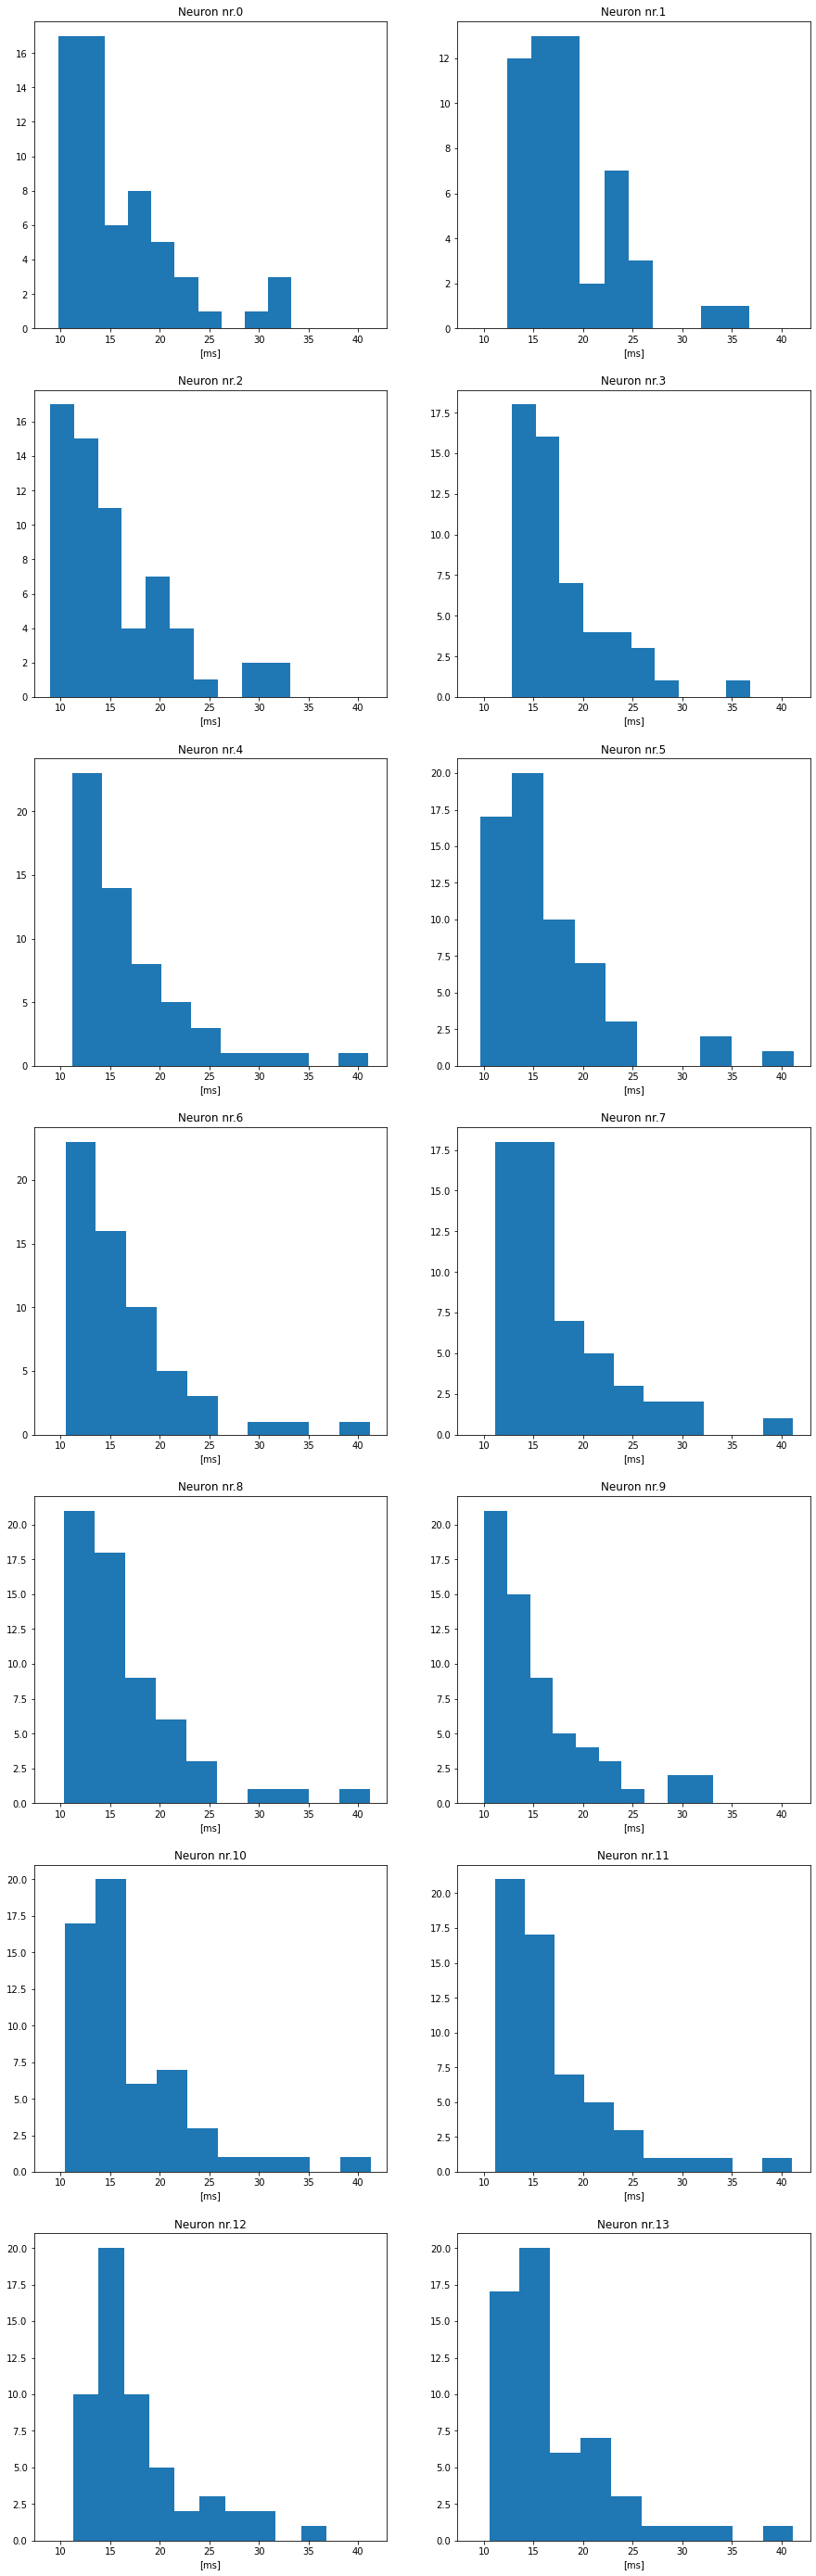

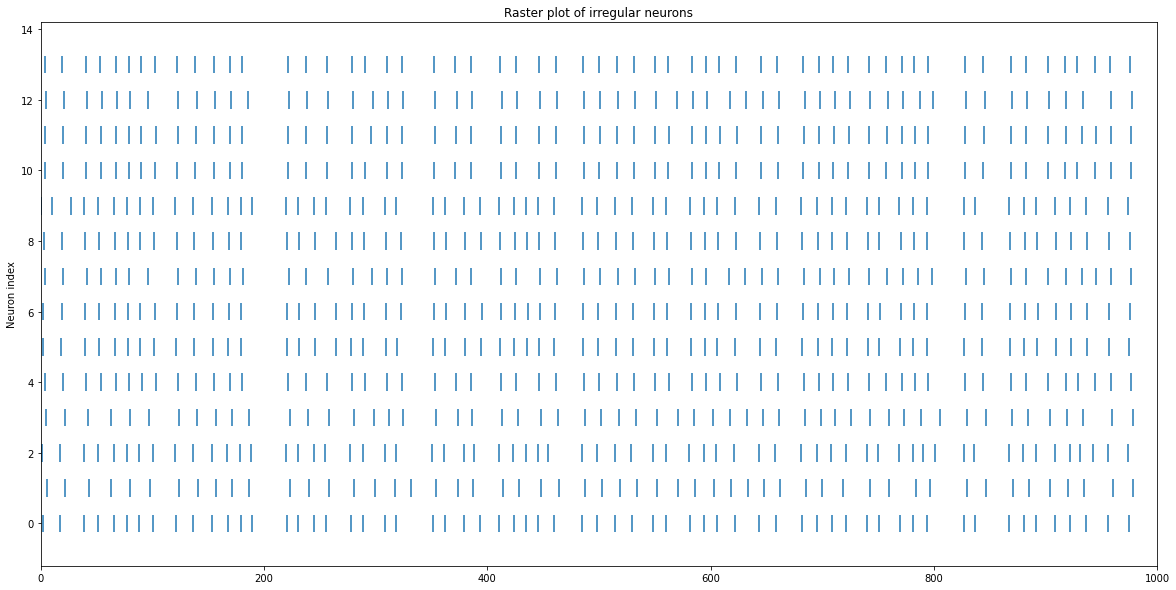

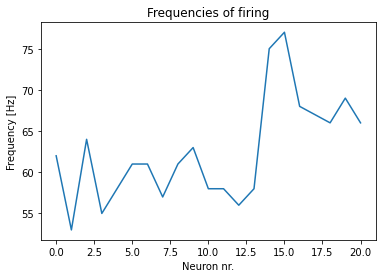

In [ ]:

#_thr{}_ref{}_leak{}_ampaw{}_nmdaw{}_gababq{}_ap1{}_ap2{}_ap3{}_ap4{}.format(thr,ref,leak,ampaw,nmdaw,gababw,ap1,ap2,ap3,ap4)
min_time = find_min_time(timestamps_original)
timestamps_preprocess = []
timestamps_ms = []

for timestamp in timestamps: 
    timestamps_preprocess.append(np.subtract(timestamp,min_time))
    timestamps_ms.append(np.subtract(timestamp,min_time)/1000)

fig, axs = plt.subplots(7,2,sharex = True,figsize=(15,50),facecolor=(1, 1, 1))  
for i, ax in enumerate(axs.ravel()): 
    ax.set_title("Neuron nr.{}".format(i)) 
    ax.hist(isi_calc(timestamps_ms[i]),bins = 10)
    ax.xaxis.set_tick_params(labelbottom=True)
    ax.set_xlabel("[ms]")
#plt.savefig("plots_irregular/FPGAh_{}.png".format(name_of_run))

plt.figure(figsize=(20,10),facecolor=(1, 1, 1))
plt.ylabel("Neuron index")
plt.title("Raster plot of irregular neurons")
_ = plt.eventplot(timestamps_ms[:14],linelengths=0.5)
#plt.savefig("plots_irregular/FPGAr_{}.png".format(name_of_run))
plt.xlim([0,1000])

plt.figure(facecolor=(1, 1, 1))
plt.plot(frequencies)
plt.title("Frequencies of firing")
plt.xlabel("Neuron nr.")
plt.ylabel("Frequency [Hz]")
plt.show()
#plt.savefig("plots_irregular/FPGAf_{}.png".format(name_of_run))

In [ ]:
# close Dynapse1
#ut.close_dynapse1(store, device_name)

In [ ]:
def binary_signal(signal, recording_duration):
    """
    Given a spike train with the spike times, create a binary signal of spikes
    
    Args:
        signal (np.ndarray): array of spike times
        recording_duration (float): duration of time the recording has lasted in ms
        
    Returns: 
            bsignal (np.ndarray): time series of binary signal
    """
    bsignal = np.zeros((recording_duration,))
    bsignal[signal] = 1
    
    return bsignal

Text(0.5, 1.0, 'Input spikes')

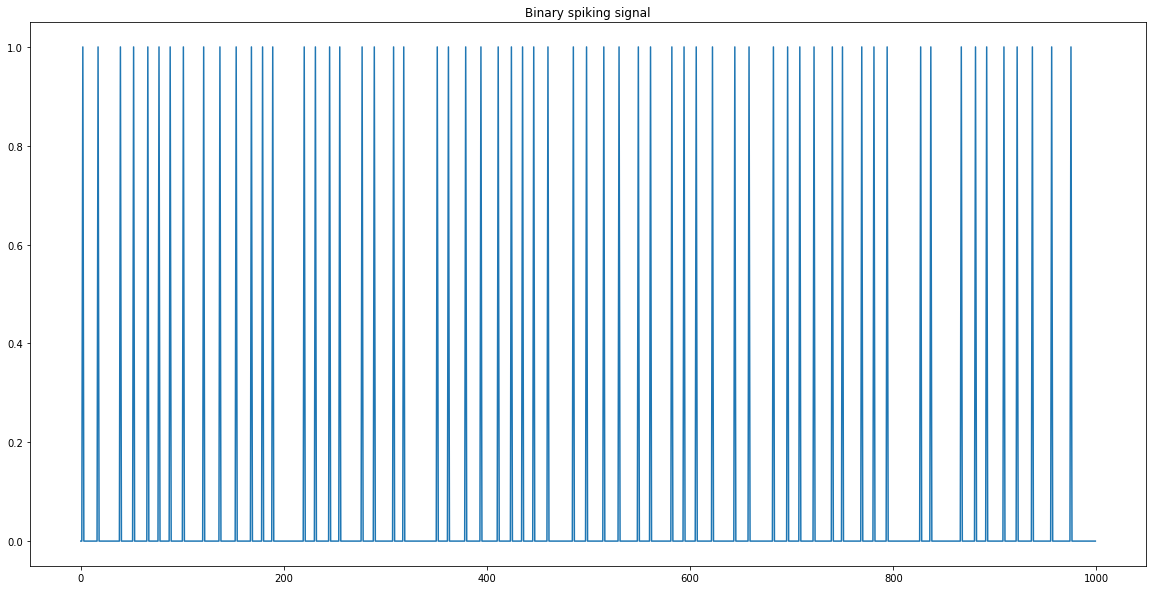

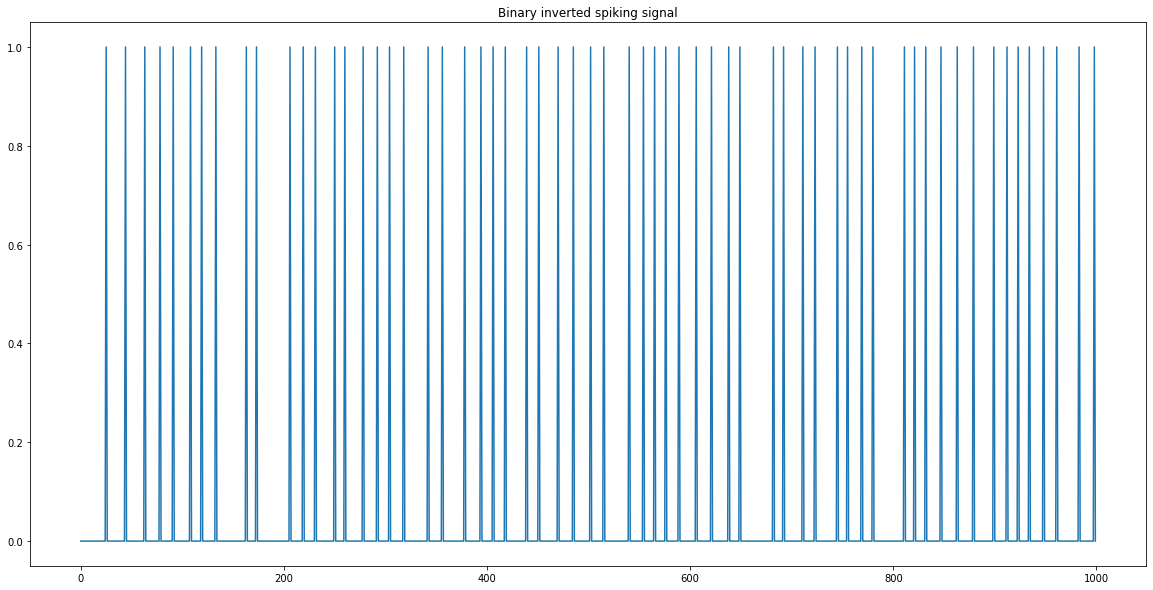

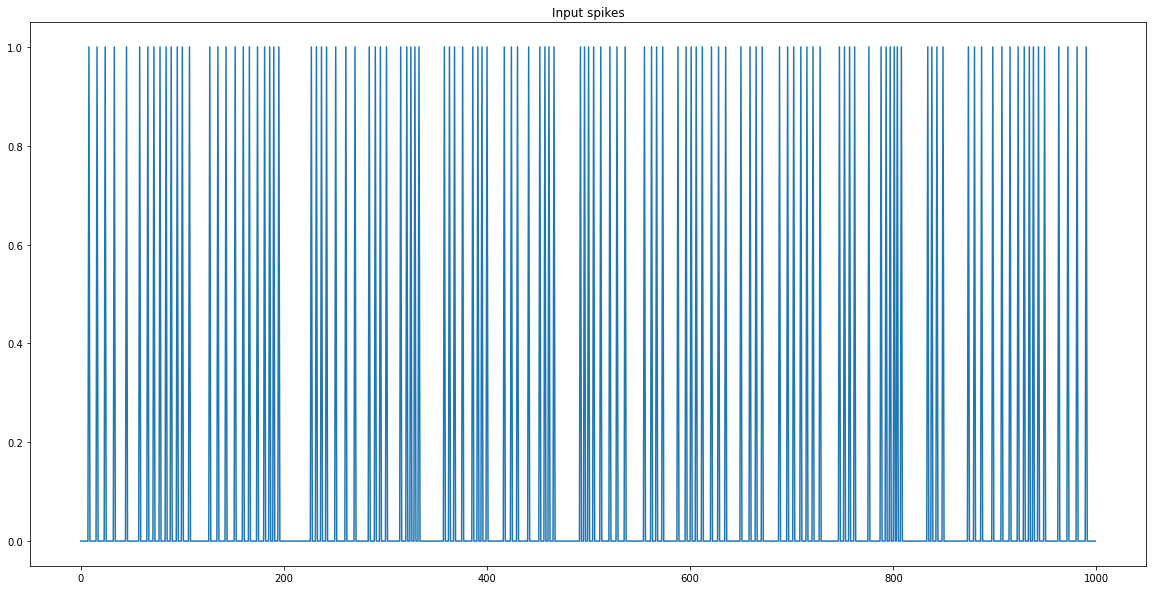

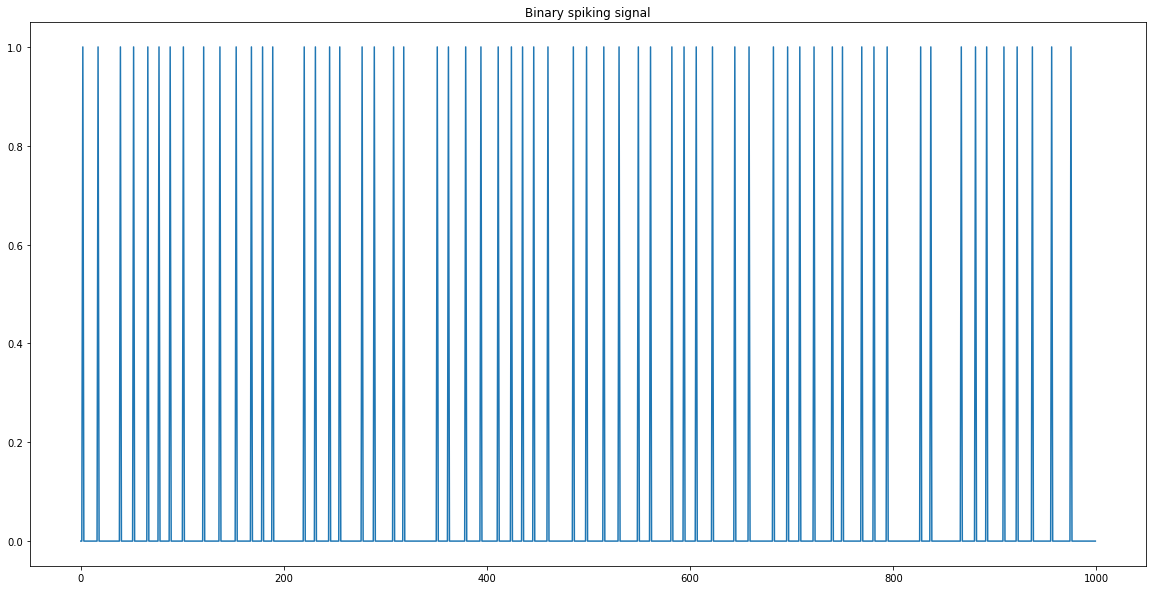

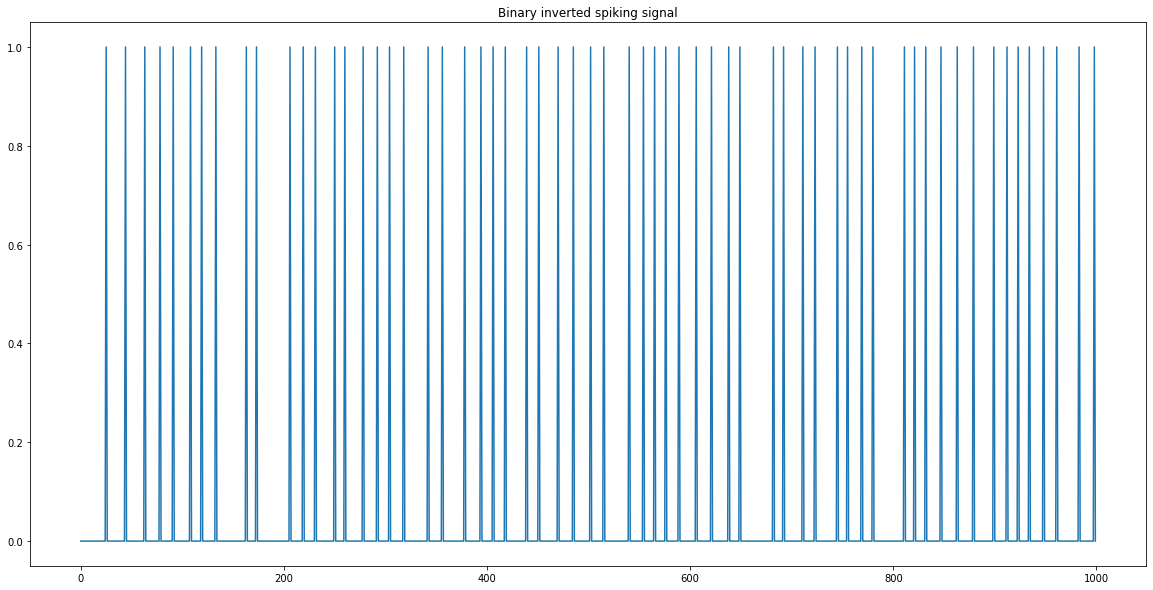

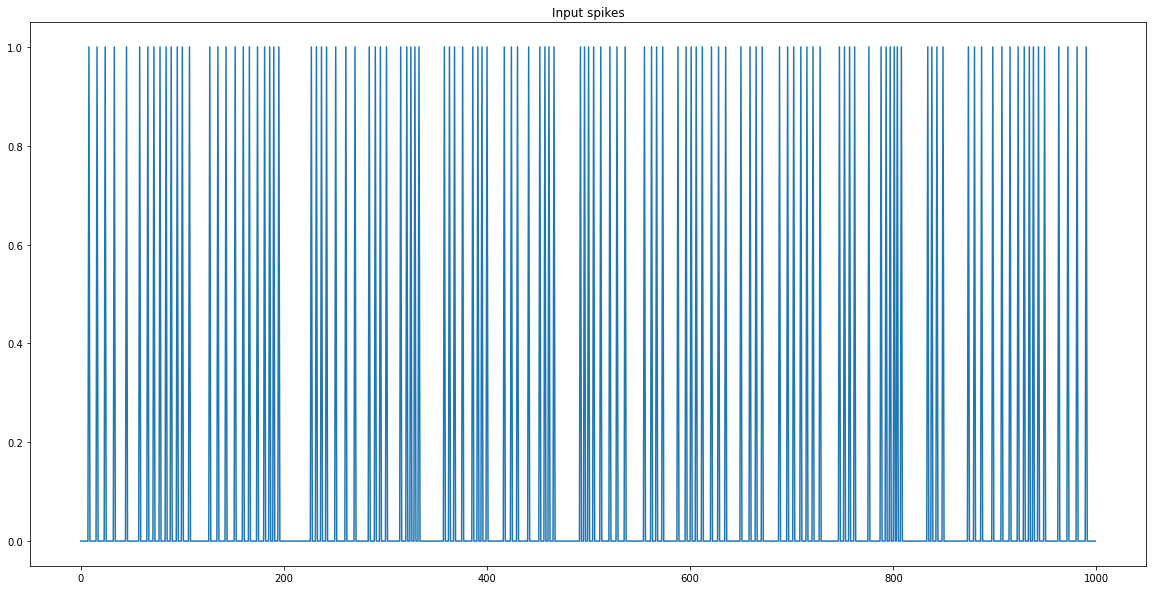

In [ ]:
#we recorded the signal for 1000 micro s
recording_duration = 1000

#as a trial we will use the 0th neuron timestamp

spike_response = timestamps_ms[0]

#Now we wish to plot the spiking response inverted and non-inverted.

response = binary_signal(np.round(spike_response).astype(int),recording_duration)
response_flipped = binary_signal(np.round(-spike_response).astype(int),recording_duration)

plt.figure(figsize = (20,10))
plt.plot(response)
plt.title("Binary spiking signal")

plt.figure(figsize = (20,10))
plt.plot(response_flipped)
plt.title("Binary inverted spiking signal")

stimuli = binary_signal((spikes).astype(int), recording_duration)
plt.figure(figsize = (20,10))
plt.plot(stimuli)
plt.title("Input spikes")

#Now we wish to plot the spiking response inverted and non-inverted.

response = binary_signal(np.round(spike_response).astype(int),recording_duration)
response_flipped = binary_signal(np.round(-spike_response).astype(int),recording_duration)

plt.figure(figsize = (20,10))
plt.plot(response)
plt.title("Binary spiking signal")

plt.figure(figsize = (20,10))
plt.plot(response_flipped)
plt.title("Binary inverted spiking signal")

stimuli = binary_signal((spikes).astype(int), recording_duration)
plt.figure(figsize = (20,10))
plt.plot(stimuli)
plt.title("Input spikes")

(1000,)


Text(0, 0.5, 'Amplitude')

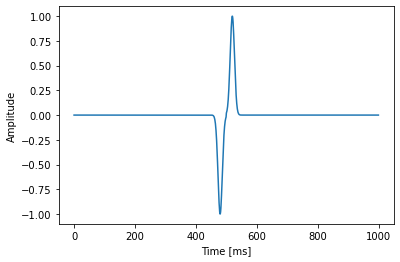

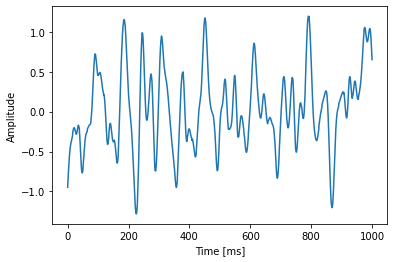

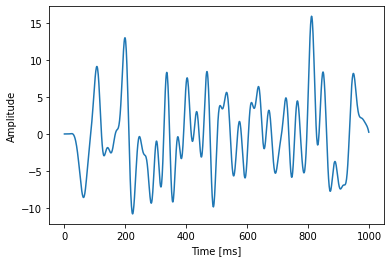

In [ ]:
import scipy 
gauss_pos = scipy.signal.gaussian(1000, 7, sym=True)
gauss_neg = -1*scipy.signal.gaussian(1000, 7, sym=True)
gauss = np.concatenate((gauss_neg[20:520], gauss_pos[480:-20]))
plt.plot(gauss)


plt.ylabel("Amplitude")
plt.xlabel("Time [ms]")

print(gauss.shape)
recon = np.convolve(gauss,response)
recon_2 = np.convolve(gauss_pos,response)
plt.figure()
plt.plot(recon[500:1501])
#plt.plot(recon_2[500:1501])
plt.xlabel("Time [ms]")
plt.ylabel("Amplitude")
#plt.figure()
#plt.plot(response)

plt.figure()
plt.plot(head_signal_filtered)
plt.xlabel("Time [ms]")
plt.ylabel("Amplitude")

In [ ]:
def normalize(signal, a, b):
      # solving system of linear equations one can find the coefficients
      A = np.min(signal)
      B = np.max(signal)
      C = (a-b)/(A-B)
      k = (C*A - a)/C
      return (signal-k)*C

0.3746738891271149


Text(0.5, 0, 'Time (ms)')

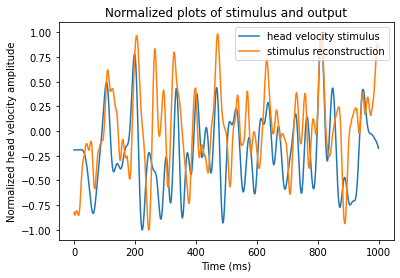

In [ ]:
from scipy.stats import pearsonr

h_n = normalize(head_signal_filtered, -1, 1)
r_n = normalize(recon[480:1480], -1, 1)

corr_n, _ = pearsonr(r_n, h_n)
print(corr_n)

plt.plot(h_n, label = "head velocity stimulus")
plt.plot(r_n, label = "stimulus reconstruction")
plt.legend(loc = "upper right")
plt.title("Normalized plots of stimulus and output")
plt.ylabel("Normalized head velocity amplitude")
plt.xlabel("Time (ms)")

In [ ]:
def coherence(stimulus, output):
    """
    Calculates the coherence of the stimulus and the output of the neurons
    
    Args:
        stimulus (np.ndarray): time series stimulus
        output (np.ndarray): time series output of neuron
        
    Return:
            coherence (np.ndarray): value of coherence of output and stimulus signal for different frequency values
    """
    #Calculate the stimulus-response cross spectrum
    frs, Prs = signal.csd(stimulus, output)
    
    #Power spectrum of the spike train (output)
    #frr, Prr = signal.welch(output)
    
    frr, Prr = signal.csd(output, output)
    
    #Power spectrum of the stimulus
    #fss, Pss = signal.welch(stimulus)
    
    fss, Pss = signal.csd(stimulus, stimulus)
    
    Cf = (np.abs(Prs)**2)/(Prr*Pss) #coherence values
    
    
    
    return Cf, frs, frr, fss, Prs, Pss, Prr

In [ ]:
Cf, frs, frr, fss, Prs, Pss, Prr= coherence(h_n, r_n)
print("Mean coherence of stimulus and output is", np.mean(Cf))

Mean coherence of stimulus and output is 0.09810063523797115
